In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [76]:
data = pd.read_csv('gdp.csv')
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


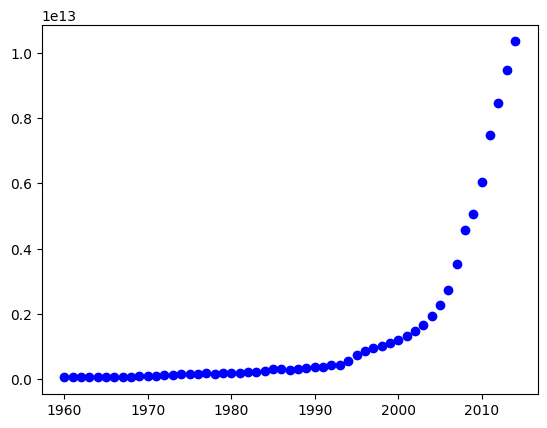

In [77]:
x_actual, y_actual = data['Year'].values, data['Value'].values
plt.plot(x_actual, y_actual, 'bo')
plt.show()

In [78]:
# logistic function
x_logistic = np.arange(-5,5,0.1)
y_logistic = 1 / (1 + np.exp(-x_logistic))

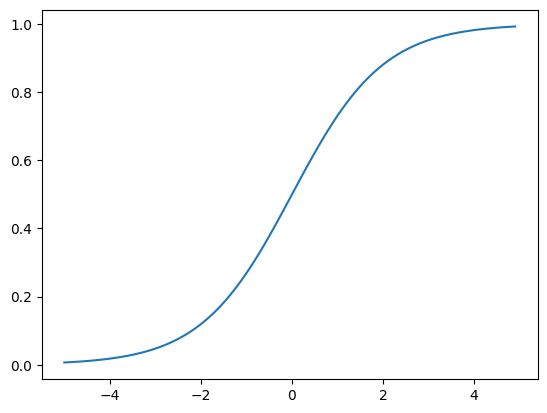

In [79]:
plt.plot(x_logistic, y_logistic)
plt.show()

In [80]:
# plotting a sigmoid function
def sigmoid(x, b1, b2):
    a = -b1 * (x-b2)
    return  1 / (1 + np.exp(a))

b1 = 0.1
b2 = 1990

y_pred = sigmoid(x_actual, b1, b2)
print(y_pred)


[0.04742587 0.05215356 0.05732418 0.06297336 0.06913842 0.07585818
 0.0831727  0.09112296 0.09975049 0.10909682 0.11920292 0.13010847
 0.14185106 0.15446527 0.16798161 0.18242552 0.19781611 0.21416502
 0.23147522 0.24973989 0.26894142 0.2890505  0.31002552 0.33181223
 0.35434369 0.37754067 0.40131234 0.42555748 0.450166   0.47502081
 0.5        0.52497919 0.549834   0.57444252 0.59868766 0.62245933
 0.64565631 0.66818777 0.68997448 0.7109495  0.73105858 0.75026011
 0.76852478 0.78583498 0.80218389 0.81757448 0.83201839 0.84553473
 0.85814894 0.86989153 0.88079708 0.89090318 0.90024951 0.90887704
 0.9168273 ]


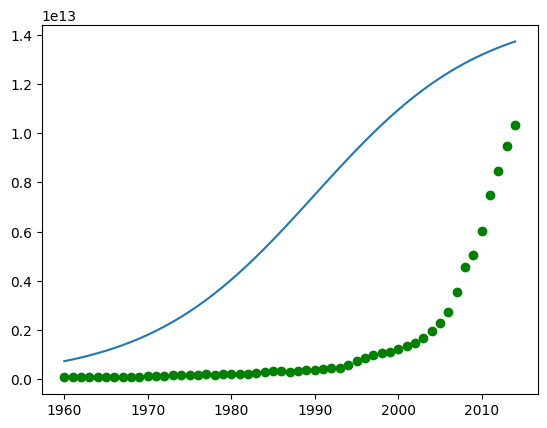

In [81]:
plt.plot(x_actual, y_pred * 15000000000000)
plt.plot(x_actual, y_actual, 'go')
plt.show()

In [82]:
#normalize
x_norm = x_actual / max(x_actual)
y_norm = y_actual / max(y_actual)

In [83]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
print ('beta_1 = {}, beta_2 = {}'.format(popt[0], pcov[1]))
 
# Create a new x range for the fitted sigmoid curve
x_fit = np.linspace(1960, 2015, 55) / max(x_actual)
 
# Apply the sigmoid function with the fitted parameters
y_fit = sigmoid(x_fit, *popt)

beta_1 = 690.4517142174786, beta_2 = [-2.88118913e-04  7.25961445e-09]


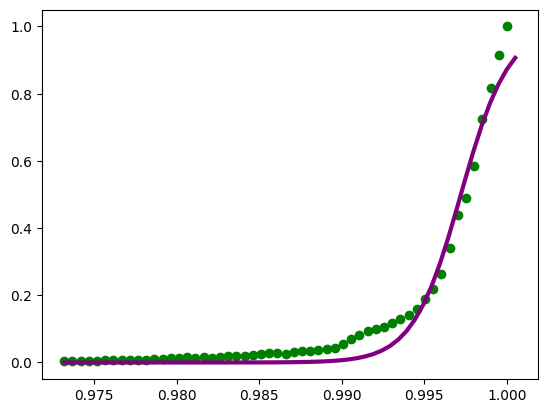

In [84]:
plt.plot(x_norm, y_norm, 'go', label='Normalized Data')  # Changed color to green for data points
plt.plot(x_fit, y_fit, linewidth=3.0, color='purple', label='Sigmoid Fit')  # Changed color to purple for the sigmoid fit line
plt.show()

In [85]:
#thank you